In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

# Data Loading

In [3]:
df.head()

,x1,x2,y
0,8.901741,-0.259148,0
1,1.988905,3.235846,0
2,13.761440,0.189009,0
3,8.991809,-0.291731,0
4,7.111311,2.912358,0


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12152 entries, 0 to 12151
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      12152 non-null  float64
 1   x2      12152 non-null  float64
 2   y       12152 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 284.9 KB


In [5]:
df.describe()

,x1,x2,y
count,12152.000000,12152.000000,12152.000000
mean,7.354508,1.340345,0.066738
std,6.527006,2.135764,0.249578
min,-13.984250,-10.000000,0.000000
25%,3.372825,-0.368606,0.000000
50%,7.324601,1.361356,0.000000
75%,11.665302,3.043072,0.000000
max,25.855938,20.000000,1.000000


In [6]:
df['y'].value_counts()

0    11341
1      811
Name: y, dtype: int64

Text(0, 0.5, 'frequency')

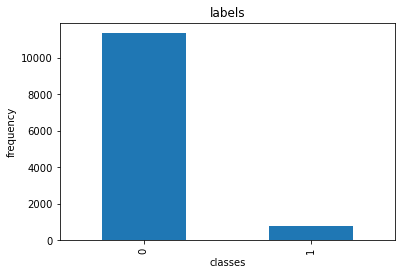

In [7]:
count_labels = pd.value_counts(df['y'], sort=True)
count_labels.plot(kind='bar')
plt.title('labels')
plt.xticks(range(2))
plt.xlabel('classes')
plt.ylabel('frequency')

/Users/yahya/anaconda/envs/mlcoding/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yahya/anaconda/envs/mlcoding/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


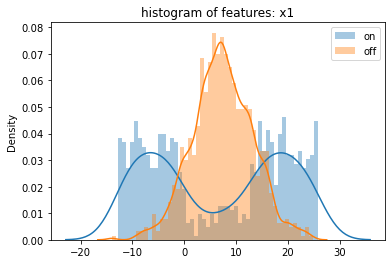

/Users/yahya/anaconda/envs/mlcoding/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yahya/anaconda/envs/mlcoding/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


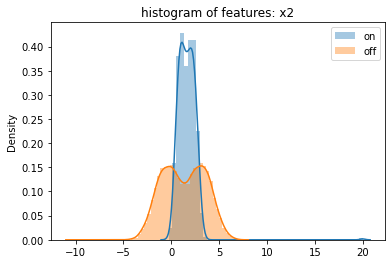

In [8]:
for feature in df.columns[:-1]:
    ax = plt.subplot()
    sns.distplot(df[df['y'] == 1][feature], bins=50, label = 'on')
    sns.distplot(df[df['y'] == 0][feature], bins=50, label = 'off')
    ax.set_xlabel('')
    ax.set_title('histogram of features: ' + str(feature))
    plt.legend(loc='best')
    plt.show()

<AxesSubplot:xlabel='y', ylabel='x2'>

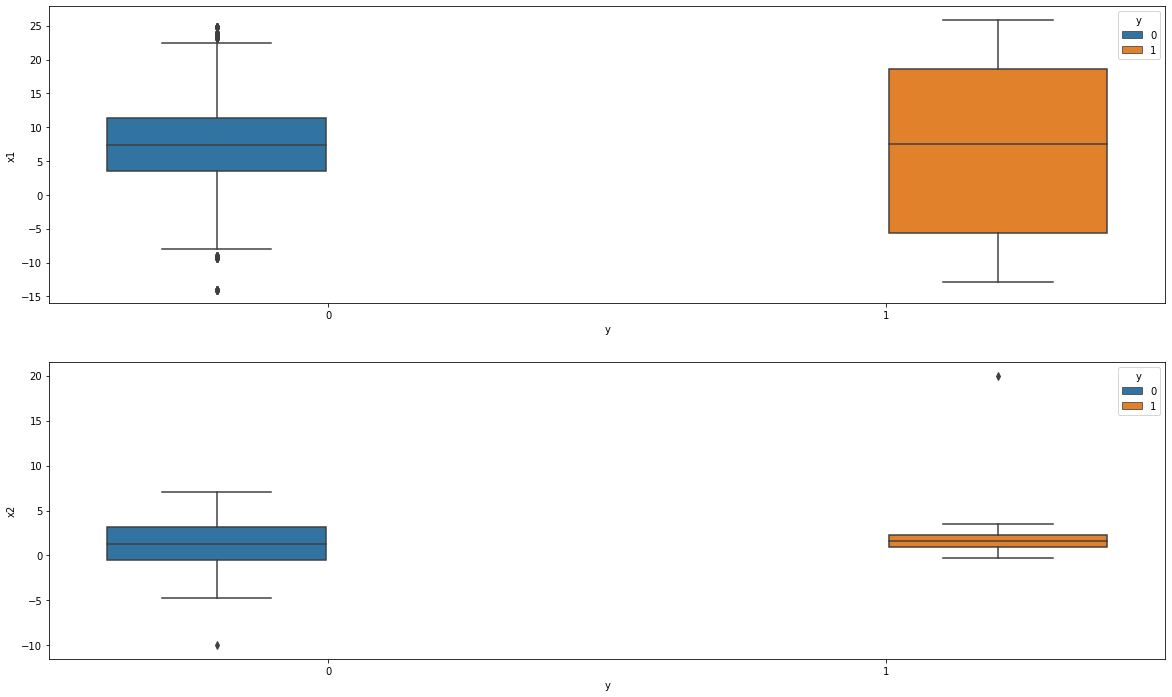

In [9]:
fig, ax = plt.subplots(2,1,figsize=(20,12))
sns.boxplot(y = 'x1', x = 'y', hue = 'y', data = df, ax = ax[0])
sns.boxplot(y = 'x2', x = 'y', hue = 'y', data = df, ax = ax[1])

<Figure size 720x3600 with 0 Axes>

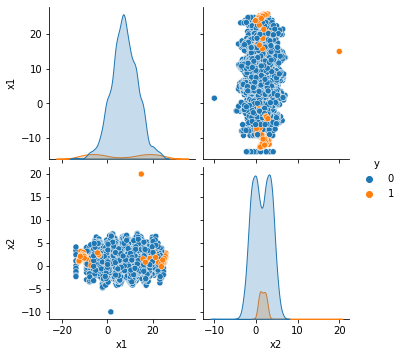

In [10]:
plt.figure(figsize=(10,50))
sns.pairplot(df, hue='y')

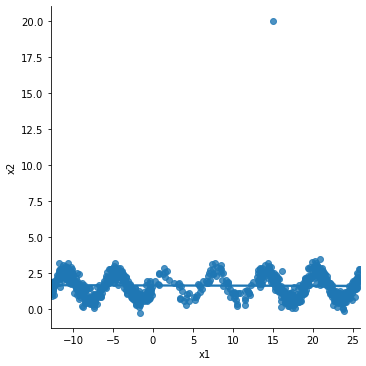

In [11]:
df_on = df[df['y'] == 1]
g = sns.lmplot(x="x1", y="x2", data=df_on)

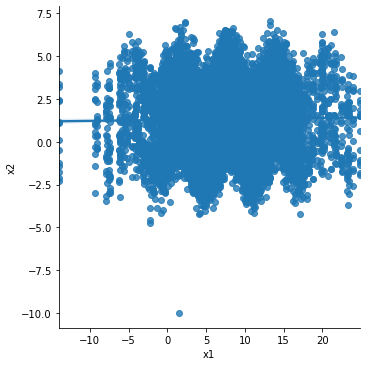

In [12]:
df_off = df[df['y'] == 0]
g = sns.lmplot(x="x1", y="x2", data=df_off)

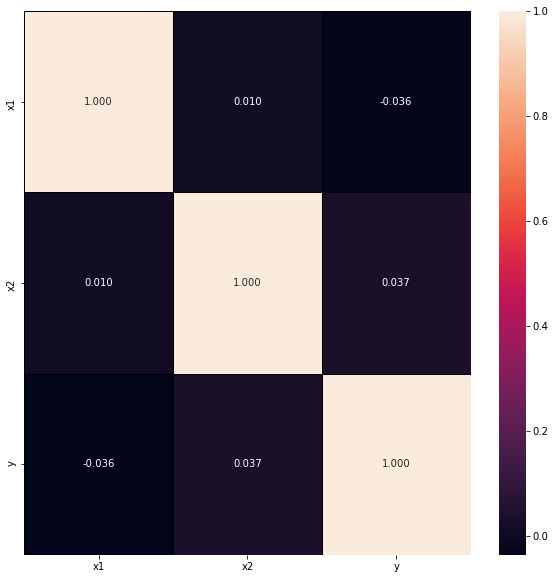

In [13]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor="black",fmt=".3f", ax=ax)
plt.show()

# Dataset Split and Feature Scaling

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df[['x1', 'x2']]
y = df['y']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121, shuffle=True, stratify=y)

In [17]:
y_train.value_counts()

0    9072
1     649
Name: y, dtype: int64

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
train_vars = [var for var in x_train.columns]

In [20]:
scaler = MinMaxScaler()
scaler.fit(x_train[train_vars])
x_train[train_vars] = scaler.transform(x_train[train_vars])
x_test[train_vars] = scaler.transform(x_test[train_vars])

<ipython-input-20-e53afdedd732>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[train_vars] = scaler.transform(x_train[train_vars])
/Users/yahya/anaconda/envs/mlcoding/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/yahya/anaconda/envs/mlcoding/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

# baseline model

In [21]:
from sklearn.svm import SVC

In [22]:
bl_svm = SVC(kernel='rbf')
bl_svm.fit(x_train, y_train)
y_pred = bl_svm.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report(y_test,y_pred))

Confusion Matrix:
 [[2252   17]
 [ 110   52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2269
           1       0.75      0.32      0.45       162

    accuracy                           0.95      2431
   macro avg       0.85      0.66      0.71      2431
weighted avg       0.94      0.95      0.94      2431



# SVM with Class Weight

In [24]:
bl_svm = SVC(kernel='rbf', class_weight='balanced')
bl_svm.fit(x_train, y_train)
y_pred = bl_svm.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
y_pred_train = bl_svm.predict(x_train)
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", confusion_matrix_train)
print("Classification Report:\n", classification_report(y_train,y_pred_train))

Confusion Matrix:
 [[8023 1049]
 [  81  568]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      9072
           1       0.35      0.88      0.50       649

    accuracy                           0.88      9721
   macro avg       0.67      0.88      0.72      9721
weighted avg       0.95      0.88      0.91      9721



In [26]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)
print("Classification Report:\n", classification_report(y_test,y_pred))

Confusion Matrix:
 [[2019  250]
 [  16  146]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      2269
           1       0.37      0.90      0.52       162

    accuracy                           0.89      2431
   macro avg       0.68      0.90      0.73      2431
weighted avg       0.95      0.89      0.91      2431



In [27]:
def evaluation(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    print("Confusion Matrix for Training Data:\n", cm_train)
    print("Classification Report for Training Data:\n\n", classification_report(y_train,y_pred_train))
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    print("Confusion Matrix for Training Data:\n", cm_test)
    print("Classification Report for Training Data:\n", classification_report(y_test,y_pred_test))

In [28]:
from sklearn.metrics import confusion_matrix
bl_svm = SVC(kernel='rbf', class_weight='balanced')
evaluation(bl_svm, x_train, y_train, x_test, y_test)

Confusion Matrix for Training Data:
 [[8023 1049]
 [  81  568]]
Classification Report for Training Data:

               precision    recall  f1-score   support

           0       0.99      0.88      0.93      9072
           1       0.35      0.88      0.50       649

    accuracy                           0.88      9721
   macro avg       0.67      0.88      0.72      9721
weighted avg       0.95      0.88      0.91      9721

Confusion Matrix for Training Data:
 [[2019  250]
 [  16  146]]
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      2269
           1       0.37      0.90      0.52       162

    accuracy                           0.89      2431
   macro avg       0.68      0.90      0.73      2431
weighted avg       0.95      0.89      0.91      2431



In [31]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'C':[0.5,1,2,4,8,16],'gamma': [0.0625,0.125, 0.250, 0.5, 1, 2], 'class_weight': ['balanced']}
kernel_svm = SVC(kernel='rbf')
kernel_svm_rs = RandomizedSearchCV(kernel_svm,param_distributions=parameters,random_state = 121, scoring='recall', refit=True)
kernel_svm_rs.fit(x_train, y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [0.5, 1, 2, 4, 8, 16],
                                        'class_weight': ['balanced'],
                                        'gamma': [0.0625, 0.125, 0.25, 0.5, 1,
                                                  2]},
                   random_state=121, scoring='recall')

In [32]:
best_svm = kernel_svm_rs.best_estimator_
print('best estimator : ', best_svm)

best estimator :  SVC(C=2, class_weight='balanced', gamma=2)


In [33]:
evaluation(best_svm, x_train, y_train, x_test, y_test)

Confusion Matrix for Training Data:
 [[7938 1134]
 [ 131  518]]
Classification Report for Training Data:

               precision    recall  f1-score   support

           0       0.98      0.88      0.93      9072
           1       0.31      0.80      0.45       649

    accuracy                           0.87      9721
   macro avg       0.65      0.84      0.69      9721
weighted avg       0.94      0.87      0.89      9721

Confusion Matrix for Training Data:
 [[2002  267]
 [  30  132]]
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      2269
           1       0.33      0.81      0.47       162

    accuracy                           0.88      2431
   macro avg       0.66      0.85      0.70      2431
weighted avg       0.94      0.88      0.90      2431



# Random Forest

In [34]:
rf = RandomForestClassifier()
evaluation(rf, x_train, y_train, x_test, y_test)

Confusion Matrix for Training Data:
 [[9072    0]
 [   0  649]]
Classification Report for Training Data:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9072
           1       1.00      1.00      1.00       649

    accuracy                           1.00      9721
   macro avg       1.00      1.00      1.00      9721
weighted avg       1.00      1.00      1.00      9721

Confusion Matrix for Training Data:
 [[2252   17]
 [  54  108]]
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2269
           1       0.86      0.67      0.75       162

    accuracy                           0.97      2431
   macro avg       0.92      0.83      0.87      2431
weighted avg       0.97      0.97      0.97      2431



In [35]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(20,201,5), 'max_depth':np.arange(2,16,4), 'class_weight': ['balanced']}
rf_bl = RandomForestClassifier()
rf_bl_rs = RandomizedSearchCV(rf_bl, param_distributions=params,random_state = 121, scoring='recall', refit=True)
rf_bl_rs.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': array([ 2,  6, 10, 14]),
                                        'n_estimators': array([ 20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,
        85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145,
       150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200])},
                   random_state=121, scoring='recall')

In [36]:
best_rf = rf_bl_rs.best_estimator_
print('best estimator : ', best_rf)

best estimator :  RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=80)


In [37]:
evaluation(best_rf, x_train, y_train, x_test, y_test)

Confusion Matrix for Training Data:
 [[8348  724]
 [  78  571]]
Classification Report for Training Data:

               precision    recall  f1-score   support

           0       0.99      0.92      0.95      9072
           1       0.44      0.88      0.59       649

    accuracy                           0.92      9721
   macro avg       0.72      0.90      0.77      9721
weighted avg       0.95      0.92      0.93      9721

Confusion Matrix for Training Data:
 [[2080  189]
 [  24  138]]
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95      2269
           1       0.42      0.85      0.56       162

    accuracy                           0.91      2431
   macro avg       0.71      0.88      0.76      2431
weighted avg       0.95      0.91      0.93      2431

